<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter07/Exercise_7_3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7.3 : Solution

In [0]:
import numpy as np
from numpy import random
from pandas import DataFrame
from enum import IntEnum, auto

In [0]:
class Term(IntEnum):
    Left = auto()
    Right = auto()
    NonTerm = auto()

In [0]:
class Walker:
  def __init__(self, length=5, alpha=0.2):
    # length should be an odd number
    self.path = []
    self.length = length
    self.v = np.array([0.0] * (length + 2))
    self.alpha = alpha
    self.restart()

  def restart(self):
    self.x = int((self.length - 1) / 2) + 1

  def move(self):
    self.x += 2*random.randint(2) - 1
    if self.x == -1:
      return Term.Left
    if self.x == self.length:
      return Term.Right

    return Term.NonTerm

In [0]:
def update_v(walker, states, r, drain=False):
  alpha = walker.alpha
  x1 = states[0] + 1
  x2 = states[-1] + 1
  walker.v[x1] += alpha * (r + walker.v[x2] - walker.v[x1])
  if drain:
    states.pop(0)
    if len(states) == 1:
      return
    update_v(walker, states, r, drain=True)

def trial(walker, steps=5, left_reward=-1):
  walker.restart()
  states = []
  states.append(walker.x)

  while True:
    terminal = walker.move()
    states.append(walker.x)
    if terminal == Term.Right:     
      update_v(walker, states, r=1, drain=True)
      break
    if terminal == Term.Left:     
      update_v(walker, states, r=left_reward, drain=True)
      break
    if len(states) >= steps + 1:
      update_v(walker, states, r=0, drain=False)
      states.pop(0)

### With 19 states.

n=4 achieves the best result as in the textbook.

[Text(0, 0, '0.0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1.0')]

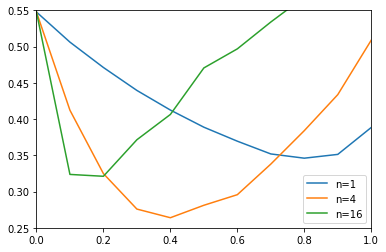

In [5]:
length = 19

df = DataFrame()
for steps in [1, 4, 16]:
  result = []
  for alpha in np.linspace(0, 1, 11):
    exact = np.linspace(-1, 1, length+2)
    _result = []
    for _ in range(100):
      walker = Walker(length=length, alpha=alpha)
      for _ in range(10):
        trial(walker, steps=steps)
        rms = np.sqrt(np.sum((walker.v[1:-1] - exact[1:-1])**2)/length)
        _result.append(rms)
    result.append(np.average(_result))
  df['n={}'.format(steps)] = result

ax = df.plot(ylim=(0.25, 0.55))
ax.set_xticklabels(np.linspace(0, 10, 6)/10)

### With 5 states.

n=1 achieves the best result.

For a short length case, large n doesn't have an advantage.

[Text(0, 0, '0.0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1.0')]

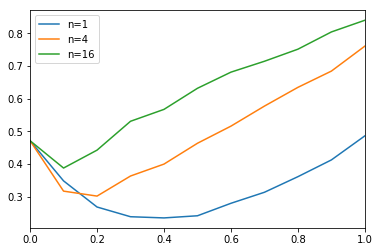

In [6]:
length = 5

df = DataFrame()
for steps in [1, 4, 16]:
  result = []
  for alpha in np.linspace(0, 1, 11):
    exact = np.linspace(-1, 1, length+2)
    _result = []
    for _ in range(100):
      walker = Walker(length=length, alpha=alpha)
      for _ in range(10):
        trial(walker, steps=steps)
        rms = np.sqrt(np.sum((walker.v[1:-1] - exact[1:-1])**2)/length)
        _result.append(rms)
    result.append(np.average(_result))
  df['n={}'.format(steps)] = result
ax = df.plot()
ax.set_xticklabels(np.linspace(0, 10, 6)/10)

### With 19 states, and setting left reward = 0

n = 16 is better than n = 4.

This is because left-side states need to reach the right-end to get reward, and it takes longer steps.  

[Text(0, 0, '0.0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1.0')]

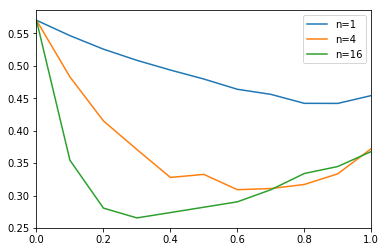

In [7]:
length = 19

df = DataFrame()
for steps in [1, 4, 16]:
  result = []
  for alpha in np.linspace(0, 1, 11):
    exact = np.linspace(0, 1, length+2)
    _result = []
    for _ in range(100):
      walker = Walker(length=length, alpha=alpha)
      for _ in range(10):
        trial(walker, steps=steps, left_reward=0)
        rms = np.sqrt(np.sum((walker.v[1:-1] - exact[1:-1])**2)/length)
        _result.append(rms)
    result.append(np.average(_result))
  df['n={}'.format(steps)] = result

ax = df.plot()
ax.set_xticklabels(np.linspace(0, 10, 6)/10)